In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sbn
from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
from statsmodels.tsa.stattools import adfuller
import os
import EDA

In [2]:
path=r"C:\Users\eguen\Documents\Smart Energy Technologies"
dir=os.listdir(path)

In [3]:
for i in dir:
  if ".xlsx" in i:
    print(i)

1-LECTURAS BLINDOBARRA 28-01-22--27-04-22.xlsx
10-LECTURAS BLINDOBARRA 15-12-23--07-03-24.xlsx
11-LECTURAS BLINDOBARRA 07-03-24--28-05-24.xlsx
2-LECTURAS BLINDOBARRA 27-04-22--06-07-22.xlsx
3-LECTURAS BLINDOBARRA 24-07-22--05-08-22.xlsx
4-LECTURAS BLINDOBARRA 23-10-22--09-11-22.xlsx
5-LECTURAS BLINDOBARRA 09-11-22--08-02-23.xlsx
6-LECTURAS BLINDOBARRA 08-02-23--27-03-23.xlsx
7-LECTURAS BLINDOBARRA 30-06-23--02-07-23.xlsx
8-LECTURAS BLINDOBARRA 01-07-23--30-09-23.xlsx
9-LECTURAS BLINDOBARRA 29-09-23--15-12-23.xlsx
LECTURAS BLINDOBARRA 25-02-24--24-05-24.xlsx


# EDA

##

In [4]:
lecturas = pd.read_excel(r"C:\Users\eguen\Documents\Smart Energy Technologies\11-LECTURAS BLINDOBARRA 07-03-24--28-05-24.xlsx")

In [5]:
# Exploracion inicial del dataframe
lecturas.tail(25)

Rep Req Date  Id Nodo Unnamed: 2  Ciclo  Unnamed: 4  Equipo Serial  \
152          NaN      NaN        NaN    NaN         NaN            NaN   
153          NaN      NaN        NaN    NaN         NaN            NaN   
154          NaN      NaN        NaN    NaN         NaN            NaN   
155          NaN      NaN        NaN    NaN         NaN            NaN   
156          NaN      NaN        NaN    NaN         NaN            NaN   
157          NaN      NaN        NaN    NaN         NaN            NaN   
158          NaN      NaN        NaN    NaN         NaN            NaN   
159          NaN      NaN        NaN    NaN         NaN            NaN   
160          NaN      NaN        NaN    NaN         NaN            NaN   
161          NaN      NaN        NaN    NaN         NaN            NaN   
162          NaN      NaN        NaN    NaN         NaN            NaN   
163          NaN      NaN        NaN    NaN         NaN            NaN   
164          NaN      NaN        NaN    NaN         NaN            NaN   
165          NaN      NaN        NaN    NaN         NaN            NaN   
166          NaN      NaN        NaN    NaN         NaN            NaN   
167          NaN      NaN        NaN    NaN         NaN            NaN   
168          NaN      NaN        NaN    NaN         NaN            NaN   
169          NaN      NaN        NaN    NaN         NaN            NaN   
170          NaN      NaN        NaN    NaN         NaN            NaN   
171          NaN      NaN        NaN    NaN         NaN            NaN   
172          NaN      NaN        NaN    NaN         NaN            NaN   
173          NaN      NaN        NaN    NaN         NaN            NaN   
174          NaN      NaN        NaN    NaN         NaN            NaN   
175          NaN      NaN        NaN    NaN         NaN            NaN   
176          NaN      NaN        NaN    NaN         NaN            NaN   

    Unnamed: 6  d Fecha Lectura Unnamed: 8  Id Suscr Usuario  ...  \
152        NaN              NaN        NaN               NaN  ...   
153        NaN              NaN         15               NaN  ...   
154        NaN              NaN        NaN               NaN  ...   
155        NaN              NaN        NaN               NaN  ...   
156        NaN              NaN        NaN               NaN  ...   
157        NaN              NaN        NaN               NaN  ...   
158        NaN              NaN        NaN               NaN  ...   
159        NaN              NaN        NaN               NaN  ...   
160        NaN              NaN        NaN               NaN  ...   
161        NaN              NaN        NaN               NaN  ...   
162        NaN              NaN        NaN               NaN  ...   
163        NaN              NaN        NaN               NaN  ...   
164        NaN              NaN        NaN               NaN  ...   
165        NaN              NaN         16               NaN  ...   
166        NaN              NaN        NaN               NaN  ...   
167        NaN              NaN        NaN               NaN  ...   
168        NaN              NaN        NaN               NaN  ...   
169        NaN              NaN        NaN               NaN  ...   
170        NaN              NaN        NaN               NaN  ...   
171        NaN              NaN        NaN               NaN  ...   
172        NaN              NaN        NaN               NaN  ...   
173        NaN              NaN        NaN               NaN  ...   
174        NaN              NaN        NaN               NaN  ...   
175        NaN              NaN        NaN               NaN  ...   
176        NaN              NaN        NaN               NaN  ...   

     Unnamed: 81  Unnamed: 82  Unnamed: 83  Unnamed: 84  Unnamed: 85  \
152            0            0            0            0            0   
153    14.070625     14.07375      14.0775    14.080625     14.08375   
154     1.175625     1.175625     1.175625     1.175625     1.175625

In [7]:
# Itera sobre las primeras 11 columnas
for idx, col in enumerate(lecturas.columns[:11]):
    # Busca la palabra "NIC" en cada celda de la columna
    if "NIC" in lecturas[col].values:
        # Encuentra la fila y columna
        fila, columna = lecturas[lecturas[col] == "NIC"].index[0], col
        print(f"La palabra 'NIC' se encuentra en la fila {fila} y columna '{columna}' (columna número {idx}).")
        break  # Detén la iteración después de encontrar la primera ocurrencia
else:
    print("La palabra 'NIC' no se encontró en las primeras 11 columnas.")

La palabra 'NIC' se encuentra en la fila 3 y columna 'Unnamed: 10' (columna número 10).


In [8]:
#Revisar informacion del dataframe
lecturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 91 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rep Req Date      3 non-null      object 
 1   Id Nodo           0 non-null      float64
 2   Unnamed: 2        2 non-null      object 
 3   Ciclo             0 non-null      float64
 4   Unnamed: 4        0 non-null      float64
 5   Equipo Serial     0 non-null      float64
 6   Unnamed: 6        2 non-null      object 
 7   d Fecha Lectura   0 non-null      float64
 8   Unnamed: 8        17 non-null     object 
 9   Id Suscr Usuario  0 non-null      float64
 10  Unnamed: 10       59 non-null     object 
 11  NIS               0 non-null      float64
 12  i ID Usuario      0 non-null      float64
 13  Unnamed: 13       174 non-null    object 
 14  Departamento      0 non-null      float64
 15  Unnamed: 15       140 non-null    object 
 16  Equipo ID         0 non-null      float64
 1

In [9]:
columnas=list(lecturas.columns)

In [10]:
datos=lecturas[columnas[idx::]]

In [11]:
datos_clean=datos[fila::]

In [12]:
#Seleccion filas/columnas relevantes
datos_clean

Unnamed: 10  NIS  i ID Usuario      Unnamed: 13  Departamento  \
3           NIC  NaN           NaN  Id Canal Equipo           NaN   
4    INTMT_2818  NaN           NaN                1           NaN   
5           NaN  NaN           NaN                2           NaN   
6           NaN  NaN           NaN                3           NaN   
7     605462155  NaN           NaN                1           NaN   
..          ...  ...           ...              ...           ...   
172         NaN  NaN           NaN                8           NaN   
173         NaN  NaN           NaN                9           NaN   
174   606567686  NaN           NaN               10           NaN   
175         NaN  NaN           NaN               11           NaN   
176         NaN  NaN           NaN               12           NaN   

             Unnamed: 15  Equipo ID  Unnamed: 17 Unnamed: 18  \
3    2024-03-07 01:00:00        NaN          NaN         NaN   
4              74683.595        NaN          NaN         NaN   
5              74683.595        NaN          NaN         NaN   
6              74683.595        NaN          NaN         NaN   
7              6382.6375        NaN          NaN         NaN   
..                   ...        ...          ...         ...   
172           1222.49125        NaN          NaN         NaN   
173           8034.42375        NaN          NaN         NaN   
174             203585.1        NaN          NaN         NaN   
175            216326.14        NaN          NaN         NaN   
176            129396.29        NaN          NaN         NaN   

             Unnamed: 19  ...          Unnamed: 81          Unnamed: 82  \
3    2024-03-08 01:00:01  ...  2024-05-19 01:00:00  2024-05-20 01:00:01   
4              76363.035  ...               193629            195210.86   
5              76363.035  ...               193629            195210.86   
6              76363.035  ...               193629            195210.86   
7            6393.191875  ...          7246.215625          7259.779375   
..                   ...  ...                  ...                  ...   
172          1222.575625  ...             1228.155           1228.22625   
173           8034.49375  ...              8039.49          8039.555625   
174            203647.88  ...             208014.8            208066.96   
175            216391.64  ...            220954.68            221010.28   
176             129461.6  ...            133986.87            134043.02   

             Unnamed: 83          Unnamed: 84          Unnamed: 85  \
3    2024-05-21 01:00:01  2024-05-22 01:00:00  2024-05-23 01:00:01   
4              196768.46             198380.7             199916.1   
5              196768.46             198380.7             199916.1   
6              196768.46             198380.7             199916.1   
7            7270.029375           7280.42125           7290.97125   
..                   ...                  ...                  ...   
172          1228.298125          1228.375625          1228.448125   
173           8039.62375           8039.69125          8039.759375   
174            208122.98             208179.9             208236.8   
175             221069.8            221129.74            221188.98   
176            134103.09            134163.43            134222.52   

             Unnamed: 86          Unnamed: 87          Unnamed: 88  \
3    2024-05-24 01:00:01  2024-05-25 01:00:00  2024-05-26 01:00:01   
4               201587.1            203268.38            204733.66   
5               201587.1            203268.38            204733.66   
6               201587.1            203268.38            204733.66   
7                7301.73          7313.028125          7324.533125   
..                   ...                  ...                  ...   
172          1228.531875            1228.6175           1228.68875   
173          8039.828125          8039.895625           8039.96375   
174            208297.78          

In [12]:
datos_clean = datos_clean.rename(columns={f'{columna}': 'NIC'})

In [13]:
datos_clean.columns

Index(['NIC', 'NIS', 'i ID Usuario', 'Unnamed: 13', 'Departamento',
       'Unnamed: 15', 'Equipo ID', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63',
       'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67',
       'Unnamed: 68', 'Unnamed: 69', 'Unnamed: 7

In [14]:
datos_clean

NIC  NIS  i ID Usuario      Unnamed: 13  Departamento  \
3           NIC  NaN           NaN  Id Canal Equipo           NaN   
4    INTMT_2818  NaN           NaN                1           NaN   
5           NaN  NaN           NaN                2           NaN   
6           NaN  NaN           NaN                3           NaN   
7     605462155  NaN           NaN                1           NaN   
..          ...  ...           ...              ...           ...   
172         NaN  NaN           NaN                8           NaN   
173         NaN  NaN           NaN                9           NaN   
174   606567686  NaN           NaN               10           NaN   
175         NaN  NaN           NaN               11           NaN   
176         NaN  NaN           NaN               12           NaN   

             Unnamed: 15  Equipo ID  Unnamed: 17 Unnamed: 18  \
3    2024-03-07 01:00:00        NaN          NaN         NaN   
4              74683.595        NaN          NaN         NaN   
5              74683.595        NaN          NaN         NaN   
6              74683.595        NaN          NaN         NaN   
7              6382.6375        NaN          NaN         NaN   
..                   ...        ...          ...         ...   
172           1222.49125        NaN          NaN         NaN   
173           8034.42375        NaN          NaN         NaN   
174             203585.1        NaN          NaN         NaN   
175            216326.14        NaN          NaN         NaN   
176            129396.29        NaN          NaN         NaN   

             Unnamed: 19  ...          Unnamed: 81          Unnamed: 82  \
3    2024-03-08 01:00:01  ...  2024-05-19 01:00:00  2024-05-20 01:00:01   
4              76363.035  ...               193629            195210.86   
5              76363.035  ...               193629            195210.86   
6              76363.035  ...               193629            195210.86   
7            6393.191875  ...          7246.215625          7259.779375   
..                   ...  ...                  ...                  ...   
172          1222.575625  ...             1228.155           1228.22625   
173           8034.49375  ...              8039.49          8039.555625   
174            203647.88  ...             208014.8            208066.96   
175            216391.64  ...            220954.68            221010.28   
176             129461.6  ...            133986.87            134043.02   

             Unnamed: 83          Unnamed: 84          Unnamed: 85  \
3    2024-05-21 01:00:01  2024-05-22 01:00:00  2024-05-23 01:00:01   
4              196768.46             198380.7             199916.1   
5              196768.46             198380.7             199916.1   
6              196768.46             198380.7             199916.1   
7            7270.029375           7280.42125           7290.97125   
..                   ...                  ...                  ...   
172          1228.298125          1228.375625          1228.448125   
173           8039.62375           8039.69125          8039.759375   
174            208122.98             208179.9             208236.8   
175             221069.8            221129.74            221188.98   
176            134103.09            134163.43            134222.52   

             Unnamed: 86          Unnamed: 87          Unnamed: 88  \
3    2024-05-24 01:00:01  2024-05-25 01:00:00  2024-05-26 01:00:01   
4               201587.1            203268.38            204733.66   
5               201587.1            203268.38            204733.66   
6               201587.1            203268.38            204733.66   
7                7301.73          7313.028125          7324.533125   
..                   ...                  ...                  ...   
172          1228.531875            1228.6175           1228.68875   
173          8039.828125          8039.895625           8039.96375   
174            208297.78            208358

In [15]:
datos_clean_drop=datos_clean.drop(columns=["NIS","i ID Usuario","Departamento","Equipo ID","Unnamed: 17","Unnamed: 18","Unnamed: 20"])

In [16]:
datos_clean_drop.columns = datos_clean_drop.iloc[0]
# Eliminar la fila 3 (índice 3)
datos_clean_drop = datos_clean_drop.drop(index=3)

In [17]:
datos_clean_drop=datos_clean_drop.drop(columns=["Id Canal Equipo"])

In [18]:
datos_clean_drop=datos_clean_drop.reset_index(drop=True)
datos_clean_drop['NIC'] = datos_clean_drop['NIC'].fillna(method='pad')

C:\Users\eguen\AppData\Local\Temp\ipykernel_17312\4062401404.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datos_clean_drop['NIC'] = datos_clean_drop['NIC'].fillna(method='pad')


In [31]:
#Eliminar NIC "0" que esta corrupto
print(datos_clean_drop[datos_clean_drop['NIC'].isin(["0", "606586647"])].index)
datos_clean_drop=datos_clean_drop.drop(index=69)
datos_clean_drop=datos_clean_drop.drop(index=70)
datos_clean_drop=datos_clean_drop.drop(index=71)
datos_clean_drop=datos_clean_drop.reset_index(drop=True)

Index([132, 133], dtype='int64')


In [32]:
# Agrupar por la columna 'NIC' y sumar las demás columnas
new_df = datos_clean_drop.groupby('NIC').sum().reset_index()
new_df.head(5)

3        NIC 2024-03-07 01:00:00 2024-03-08 01:00:01 2024-03-09 01:00:01  \
0  605442307            82549.64          82567.8275         82586.75875   
1  605443194         90519.81125            90519.83         90519.84875   
2  605444971           129988.44        130077.35625         130154.6625   
3  605446435        74943.779375            74968.05        74993.905625   
4  605447212                   0                   0                   0   

3 2024-03-10 01:00:01 2024-03-11 01:00:01 2024-03-12 01:00:01  \
0         82606.26125         82622.12875         82641.38375   
1           90519.865          90519.8825             90519.9   
2         130229.0225        130300.90375        130371.79875   
3        75014.733125         75037.11625         75061.96125   
4                   0                   0                   0   

3 2024-03-13 01:00:00 2024-03-14 01:00:01 2024-03-15 01:00:01  ...  \
0          82655.1825         82674.25625          82687.6275  ...   
1            90519.92           90519.945          90519.9625  ...   
2         130486.3975         130612.2875        130694.05125  ...   
3         75085.27875         75110.11125         75134.08375  ...   
4                   0                   0                   0  ...   

3 2024-05-19 01:00:00 2024-05-20 01:00:01 2024-05-21 01:00:01  \
0         83795.99875         83811.86625         83824.87375   
1          91171.5875          91202.5075          91239.6425   
2         135430.7525         135494.8725         135565.9375   
3         76552.25625         76574.29625        76599.640625   
4           54.394375           54.444375             54.4875   

3 2024-05-22 01:00:00 2024-05-23 01:00:01 2024-05-24 01:00:01  \
0            83842.89           83858.105         83881.11125   
1         91279.11375         91309.85375           91345.325   
2         135635.5225           135702.13           135773.48   
3         76621.47125        76642.694375         76666.67875   
4             54.5325              54.575           54.620625   

3 2024-05-25 01:00:00 2024-05-26 01:00:01 2024-05-27 01:00:01  \
0            83906.54         83921.81625           83940.575   
1         91374.58875         91400.72625         91424.19125   
2         135843.5425           135905.15           135959.65   
3         76687.84625        76708.773125           76724.125   
4            54.66375           54.704375              54.745   

3 2024-05-28 01:00:01  
0         83955.51875  
1         91454.04875  
2         136030.8625  
3        76746.714375  
4            54.74875  

[5 rows x 73 columns]

In [33]:
# Convertir los nombres de las columnas a fechas
new_columns =[pd.to_datetime(col, errors='ignore') if col != 'NIC' else col for col in new_df.columns]

# Asignar los nuevos nombres de las columnas al DataFrame
new_df.columns = new_columns

C:\Users\eguen\AppData\Local\Temp\ipykernel_17312\1019924978.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  new_columns =[pd.to_datetime(col, errors='ignore') if col != 'NIC' else col for col in new_df.columns]


In [34]:
new_df

NIC 2024-03-07 01:00:00 2024-03-08 01:00:01 2024-03-09 01:00:01  \
0    605442307            82549.64          82567.8275         82586.75875   
1    605443194         90519.81125            90519.83         90519.84875   
2    605444971           129988.44        130077.35625         130154.6625   
3    605446435        74943.779375            74968.05        74993.905625   
4    605447212                   0                   0                   0   
5    605448009                   0                   0                   0   
6    605449886                   0                   0                   0   
7    605450612                   0                   0                   0   
8    605451409       989579.378125                   0           989579.38   
9    605452286          233801.225                   0          234001.575   
10   605453063          291322.185                   0           291448.29   
11   605454840           39.101875                   0           39.130625   
12   605455527           360191.61           360321.48           360463.41   
13   605456304        26439.188125        26439.194375        26439.200625   
14   605457191        40650.421875         40651.86125        40653.339375   
15   605458978                   0                   0                   0   
16   605459755                   0                   0                   0   
17   605460591                   0                   0                   0   
18   605461378                   0                   0                   7   
19   605462155        17858.791875        17876.274375         17896.15125   
20   605463932            52117.32           52178.835          52234.6275   
21   605464719            70002.15          70136.5125          70272.5175   
22   606562771         116173.1025         116173.2075         116173.2975   
23   606564335          341181.815          341518.085          341804.835   
24   606565012         14757.35875        14757.513125        14757.663125   
25   606566809                   0                   0                   0   
26   606567686           549307.53           549501.12           549699.53   
27   606568463                   0                   0                   0   
28   606569240         60484.59625         60502.57125          60524.3075   
29   606570086         128325.7225        128341.52125           128370.05   
30   606571863          289948.345          289987.675          290029.865   
31   606572640             5498.47         5498.471875         5498.471875   
32   606573427         76286.75625         76301.56375            76320.86   
33   606574204          230202.925            230295.9          230392.465   
34   606575991           94624.735          94641.5575            94655.47   
35   606576778          142673.815          142723.055           142775.27   
36   606577555         55494.16875          55509.8875          55525.5375   
37   606578332           19.645625            19.65125           19.656875   
38   606579119          184089.385          184126.895           184164.64   
39   606580955           1753.2575           1753.2575           1753.2575   
40   606581732           370234.21           370304.57            370372.7   
41   606582519           177227.47          177291.955          177353.145   
42   606583306         82252.48375          82287.2525          82325.8725   
43   606584183         457145.2475          457336.295         457522.6025   
44   606585860            41.28875           41.298125           41.308125   
45   606586647           82.936875            82.96625           82.994375   
46   606587424        30954.570625        30954.570625        30954.570625   
47   606588201         6731.678125         6731.678125         6731.678125   
48   606589098          74034.6725          74034.6725          74034.6725   
49   606590824                   0                   0                   0   
50   606591601           36.87187

In [27]:
new_df.to_csv(r"C:\Users\eguen\Documents\Smart Energy Technologies\LECTURAS030724.csv",index=False)

In [28]:
new_df=pd.read_csv(r"C:\Users\eguen\Documents\Smart Energy Technologies\LECTURAS030724.csv")

In [29]:
new_df

Unnamed: 0         NIC  2024-03-07 01:00:00  2024-03-08 01:00:01  \
0            0   605442307         82549.640000         82567.827500   
1            1   605443194         90519.811250         90519.830000   
2            2   605444971        129988.440000        130077.356250   
3            3   605446435         74943.779375         74968.050000   
4            4   605447212             0.000000             0.000000   
5            5   605448009             0.000000             0.000000   
6            6   605449886             0.000000             0.000000   
7            7   605450612             0.000000             0.000000   
8            8   605451409        989579.378125             0.000000   
9            9   605452286        233801.225000             0.000000   
10          10   605453063        291322.185000             0.000000   
11          11   605454840            39.101875             0.000000   
12          12   605455527        360191.610000        360321.480000   
13          13   605456304         26439.188125         26439.194375   
14          14   605457191         40650.421875         40651.861250   
15          15   605458978             0.000000             0.000000   
16          16   605459755             0.000000             0.000000   
17          17   605460591             0.000000             0.000000   
18          18   605461378             0.000000             0.000000   
19          19   605462155         17858.791875         17876.274375   
20          20   605463932         52117.320000         52178.835000   
21          21   605464719         70002.150000         70136.512500   
22          22   606562771        116173.102500        116173.207500   
23          23   606563558             0.000000             0.000000   
24          24   606564335        341181.815000        341518.085000   
25          25   606565012         14757.358750         14757.513125   
26          26   606566809             0.000000             0.000000   
27          27   606567686        549307.530000        549501.120000   
28          28   606568463             0.000000             0.000000   
29          29   606569240         60484.596250         60502.571250   
30          30   606570086        128325.722500        128341.521250   
31          31   606571863        289948.345000        289987.675000   
32          32   606572640          5498.470000          5498.471875   
33          33   606573427         76286.756250         76301.563750   
34          34   606574204        230202.925000        230295.900000   
35          35   606575991         94624.735000         94641.557500   
36          36   606576778        142673.815000        142723.055000   
37          37   606577555         55494.168750         55509.887500   
38          38   606578332            19.645625            19.651250   
39          39   606579119        184089.385000        184126.895000   
40          40   606580955          1753.257500          1753.257500   
41          41   606581732        370234.210000        370304.570000   
42          42   606582519        177227.470000        177291.955000   
43          43   606583306         82252.483750         82287.252500   
44          44   606584183        457145.247500        457336.295000   
45          45   606585860            41.288750            41.298125   
46          46   606586647            82.936875            82.966250   
47          47   606587424         30954.570625         30954.570625   
48          48   606588201          6731.678125          6731.678125   
49          49   606589098         74034.672500         74034.672500   
50          50   606590824             0.000000             0.000000   
51          51   606591601            36.871875            36.880000   
52          52   606592498            13.392500            13.396250   
53          53   606593275        566672.730000        566822.650000   
54          54   606594052         71508.737

In [36]:
datos = new_df.transpose()
datos= datos.drop(index="Unnamed: 0")

In [37]:
datos.columns = datos.iloc[0]

In [38]:
datos=datos.drop(index="NIC")

In [39]:
datos=datos.reset_index(drop=True)

In [40]:
datos = datos.astype(float)

In [41]:
datos

NIC    605442307    605443194     605444971     605446435  605447212  \
0    82549.64000  90519.81125  129988.44000  74943.779375   0.000000   
1    82567.82750  90519.83000  130077.35625  74968.050000   0.000000   
2    82586.75875  90519.84875  130154.66250  74993.905625   0.000000   
3    82606.26125  90519.86500  130229.02250  75014.733125   0.000000   
4    82622.12875  90519.88250  130300.90375  75037.116250   0.000000   
..           ...          ...           ...           ...        ...   
67   83881.11125  91345.32500  135773.48000  76666.678750  54.620625   
68   83906.54000  91374.58875  135843.54250  76687.846250  54.663750   
69   83921.81625  91400.72625  135905.15000  76708.773125  54.704375   
70   83940.57500  91424.19125  135959.65000  76724.125000  54.745000   
71   83955.51875  91454.04875  136030.86250  76746.714375  54.748750   

NIC    605448009   605449886   605450612      605451409   605452286  ...  \
0         0.0000       0.000       0.000  989579.378125  233801.225  ...   
1         0.0000       0.000       0.000       0.000000       0.000  ...   
2         0.0000       0.000       0.000  989579.380000  234001.575  ...   
3         0.0000       0.000       0.000  989579.381875  234107.270  ...   
4         0.0000       0.000       0.000  989579.382500  234196.690  ...   
..           ...         ...         ...            ...         ...  ...   
67   113280.5575  216437.830  215663.710  989580.192500  241054.555  ...   
68   113280.6650  216516.080  215715.580  989580.192500  241150.845  ...   
69   113280.7625  216585.975  215766.285  989580.272500  241247.055  ...   
70   113280.8550  216649.050  215815.755  989580.273750  241333.900  ...   
71   113280.9725  216723.560  215815.860  989580.273750  241426.515  ...   

NIC     606587424    606588201   606589098  606590824  606591601  606592498  \
0    30954.570625  6731.678125  74034.6725        0.0  36.871875  13.392500   
1    30954.570625  6731.678125  74034.6725        0.0  36.880000  13.396250   
2    30954.570625  6731.678125  74034.6725        0.0  36.889375  13.401875   
3    30954.570625  6731.678750  74034.6725        0.0  36.898750  13.410625   
4    30954.570625  6731.678750  74034.6725        0.0  36.907500  13.415625   
..            ...          ...         ...        ...        ...        ...   
67   30954.579375  6731.684375  92200.6575        0.0  37.563125  13.819375   
68   30954.579375  6731.684375  92200.6575        0.0  37.572500  13.825000   
69   30954.579375  6731.684375  92200.6575        0.0  37.581875  13.830625   
70   30954.580000  6731.685000  92200.6575        0.0  37.591250  13.836875   
71   30954.580000  6731.685000  92200.6575        0.0  37.599375  13.841875   

NIC  606593275    606594052   606597303  INTMT_2818  
0    566672.73  71508.73750  285996.125  224050.785  
1    566822.65  71526.77000  286098.030  229089.105  
2    566992.73  71546.44000  286200.120  234374.775  
3    567257.75  71571.88750  286305.600  239578.725  
4    567446.23  71591.46125  286393.125  244526.775  
..         ...          ...         ...         ...  
67   581105.38  73086.63500  292890.365  604761.300  
68   581250.62  73107.42750  292977.615  609805.140  
69   581401.50  73128.78125  293040.775  614200.980  
70   581678.54  73153.03750  293106.730  618734.940  
71   581806.58  73171.16750  293179.780  623202.900  

[72 rows x 57 columns]

#Analisis Estadistico

In [42]:
datos.describe()

NIC       605442307     605443194      605444971     605446435  605447212  \
count     72.000000     72.000000      72.000000     72.000000  72.000000   
mean   74037.561979  80647.610226  118440.394913  67462.975200  16.602135   
std    26363.138626  28714.722435   42205.916049  24024.949003  25.204742   
min        0.000000      0.000000       0.000000      0.000000   0.000000   
25%    82732.821875  90520.006875  130886.125937  75188.616875   0.000000   
50%    83300.640625  90534.859375  133232.896250  75885.668750   0.000000   
75%    83618.618125  90837.647500  134698.265625  76326.686094  54.025781   
max    83955.518750  91454.048750  136030.862500  76746.714375  54.748750   

NIC        605448009      605449886      605450612      605451409  \
count      72.000000      72.000000      72.000000      72.000000   
mean    34613.265486   65960.202569   65780.127361  948347.290182   
std     52547.651271  100137.010896   99863.393111  199131.774311   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000  989579.545000   
50%         0.000000       0.000000       0.000000  989579.748125   
75%    113278.933750  215249.301250  214871.387500  989579.971250   
max    113280.972500  216723.560000  215815.860000  989580.273750   

NIC        605452286  ...     606587424    606588201     606589098  606590824  \
count      72.000000  ...     72.000000    72.000000     72.000000       72.0   
mean   227815.039444  ...  24935.629878  5422.743655  65873.586285        0.0   
std     47889.931765  ...  12336.939585  2682.910405  33568.163871        0.0   
min         0.000000  ...      0.000000     0.000000      0.000000        0.0   
25%    235319.837500  ...  30954.570625  6731.678750  74034.672500        0.0   
50%    237787.457500  ...  30954.575000  6731.681875  74034.672500        0.0   
75%    239595.061250  ...  30954.576875  6731.683125  92047.046875        0.0   
max    241426.515000  ...  30954.580000  6731.685000  92200.657500        0.0   

NIC    606591601  606592498      606593275     606594052      606597303  \
count  72.000000  72.000000      72.000000     72.000000      72.000000   
mean   29.979123  10.960304  462436.433333  58233.731701  277580.218681   
std    14.833815   5.424290  228835.618598  28815.514521   58327.261813   
min     0.000000   0.000000       0.000000      0.000000       0.000000   
25%    36.905313  13.414375  567399.110000  71586.567812  287388.435000   
50%    37.061563  13.513437  571197.050000  71942.369375  289702.730000   
75%    37.425781  13.735000  578381.630000  72766.175313  291598.737500   
max    37.599375  13.841875  581806.580000  73171.167500  293179.780000   

NIC       INTMT_2818  
count      72.000000  
mean   428851.341250  
std    121806.221821  
min    224050.785000  
25%    315448.860000  
50%    443926.050000  
75%    530682.750000  
max    623202.900000  

[8 rows x 57 columns]

In [43]:
def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    timeseries = timeseries.iloc[:,0].values
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

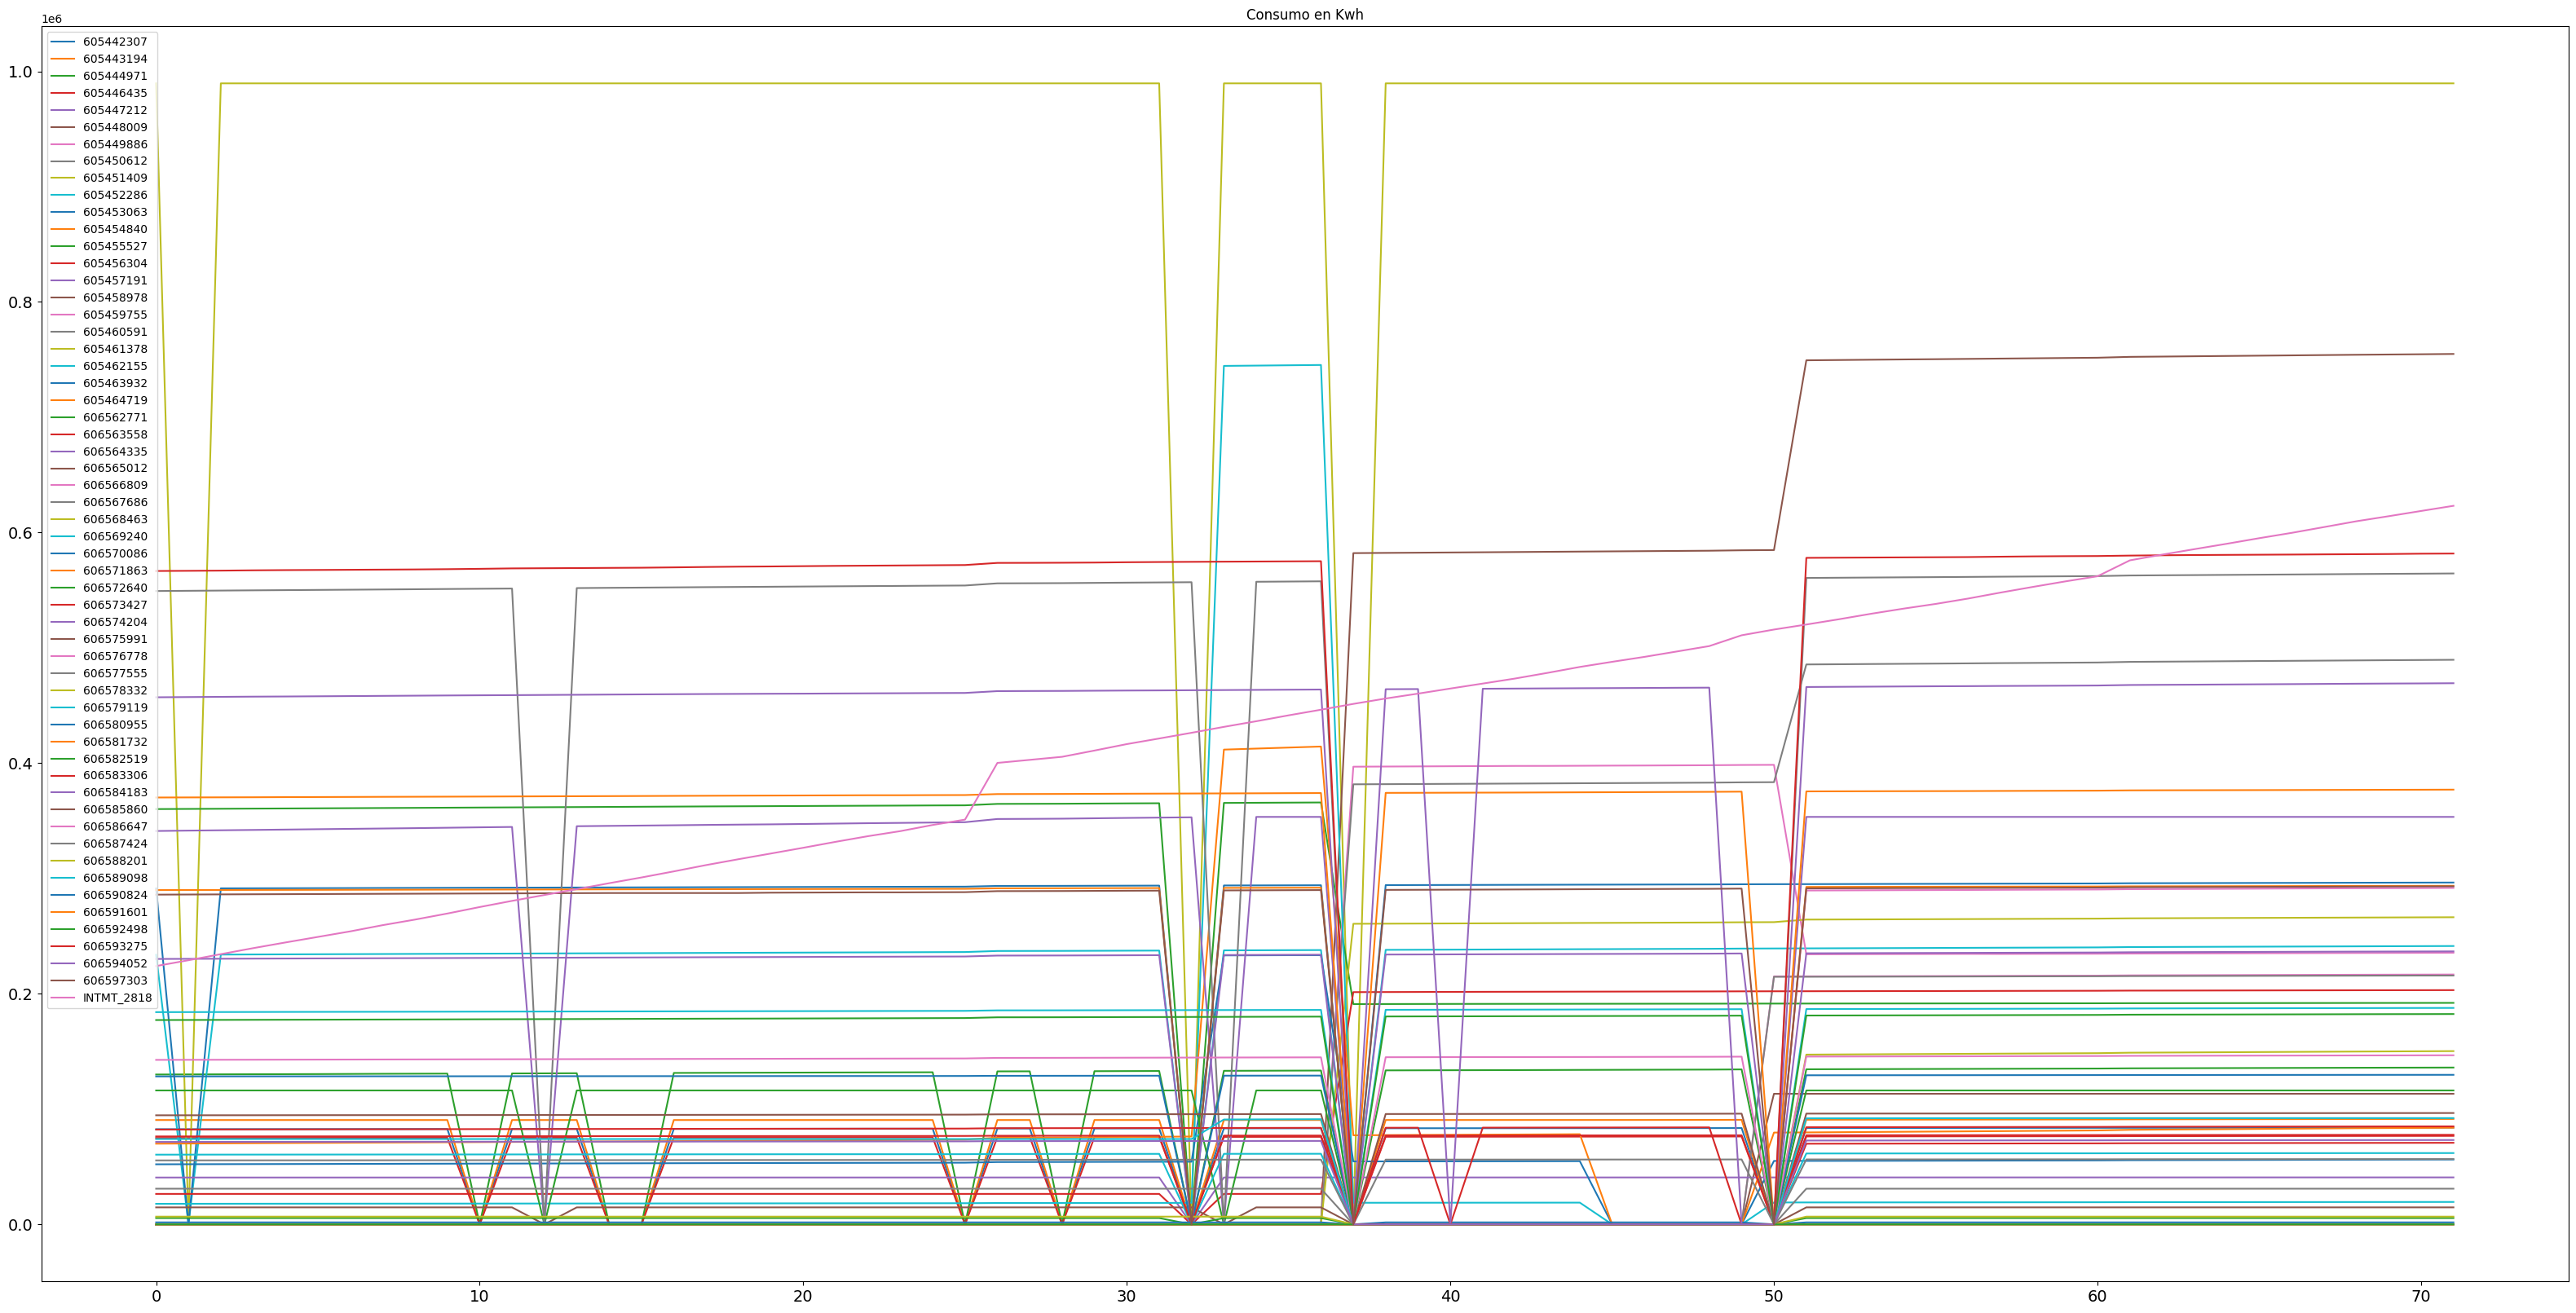

In [44]:
datos.plot(figsize=(40,20), title= 'Consumo en Kwh', fontsize=14)
plt.legend(loc='best')
plt.show()

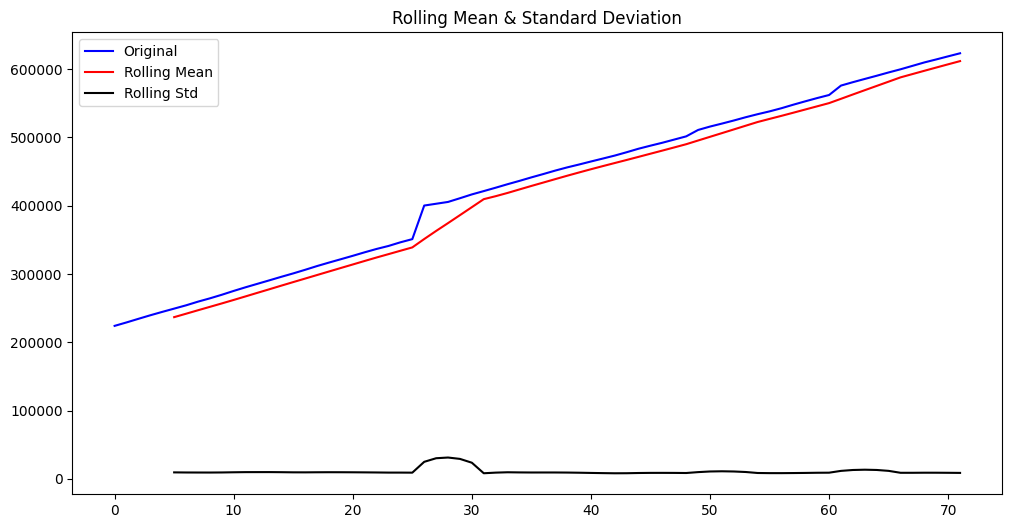

Results of Dickey-Fuller Test:
Test Statistic                 -0.573581
p-value                         0.876841
#Lags Used                      0.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [40]:
def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=6).mean()
    rolstd = timeseries.rolling(window=6).std()

    # Plot rolling statistics:
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Llamar a la función con la serie de tiempo correcta
test_stationarity(datos["INTMT_2818"])

# Visualizacion

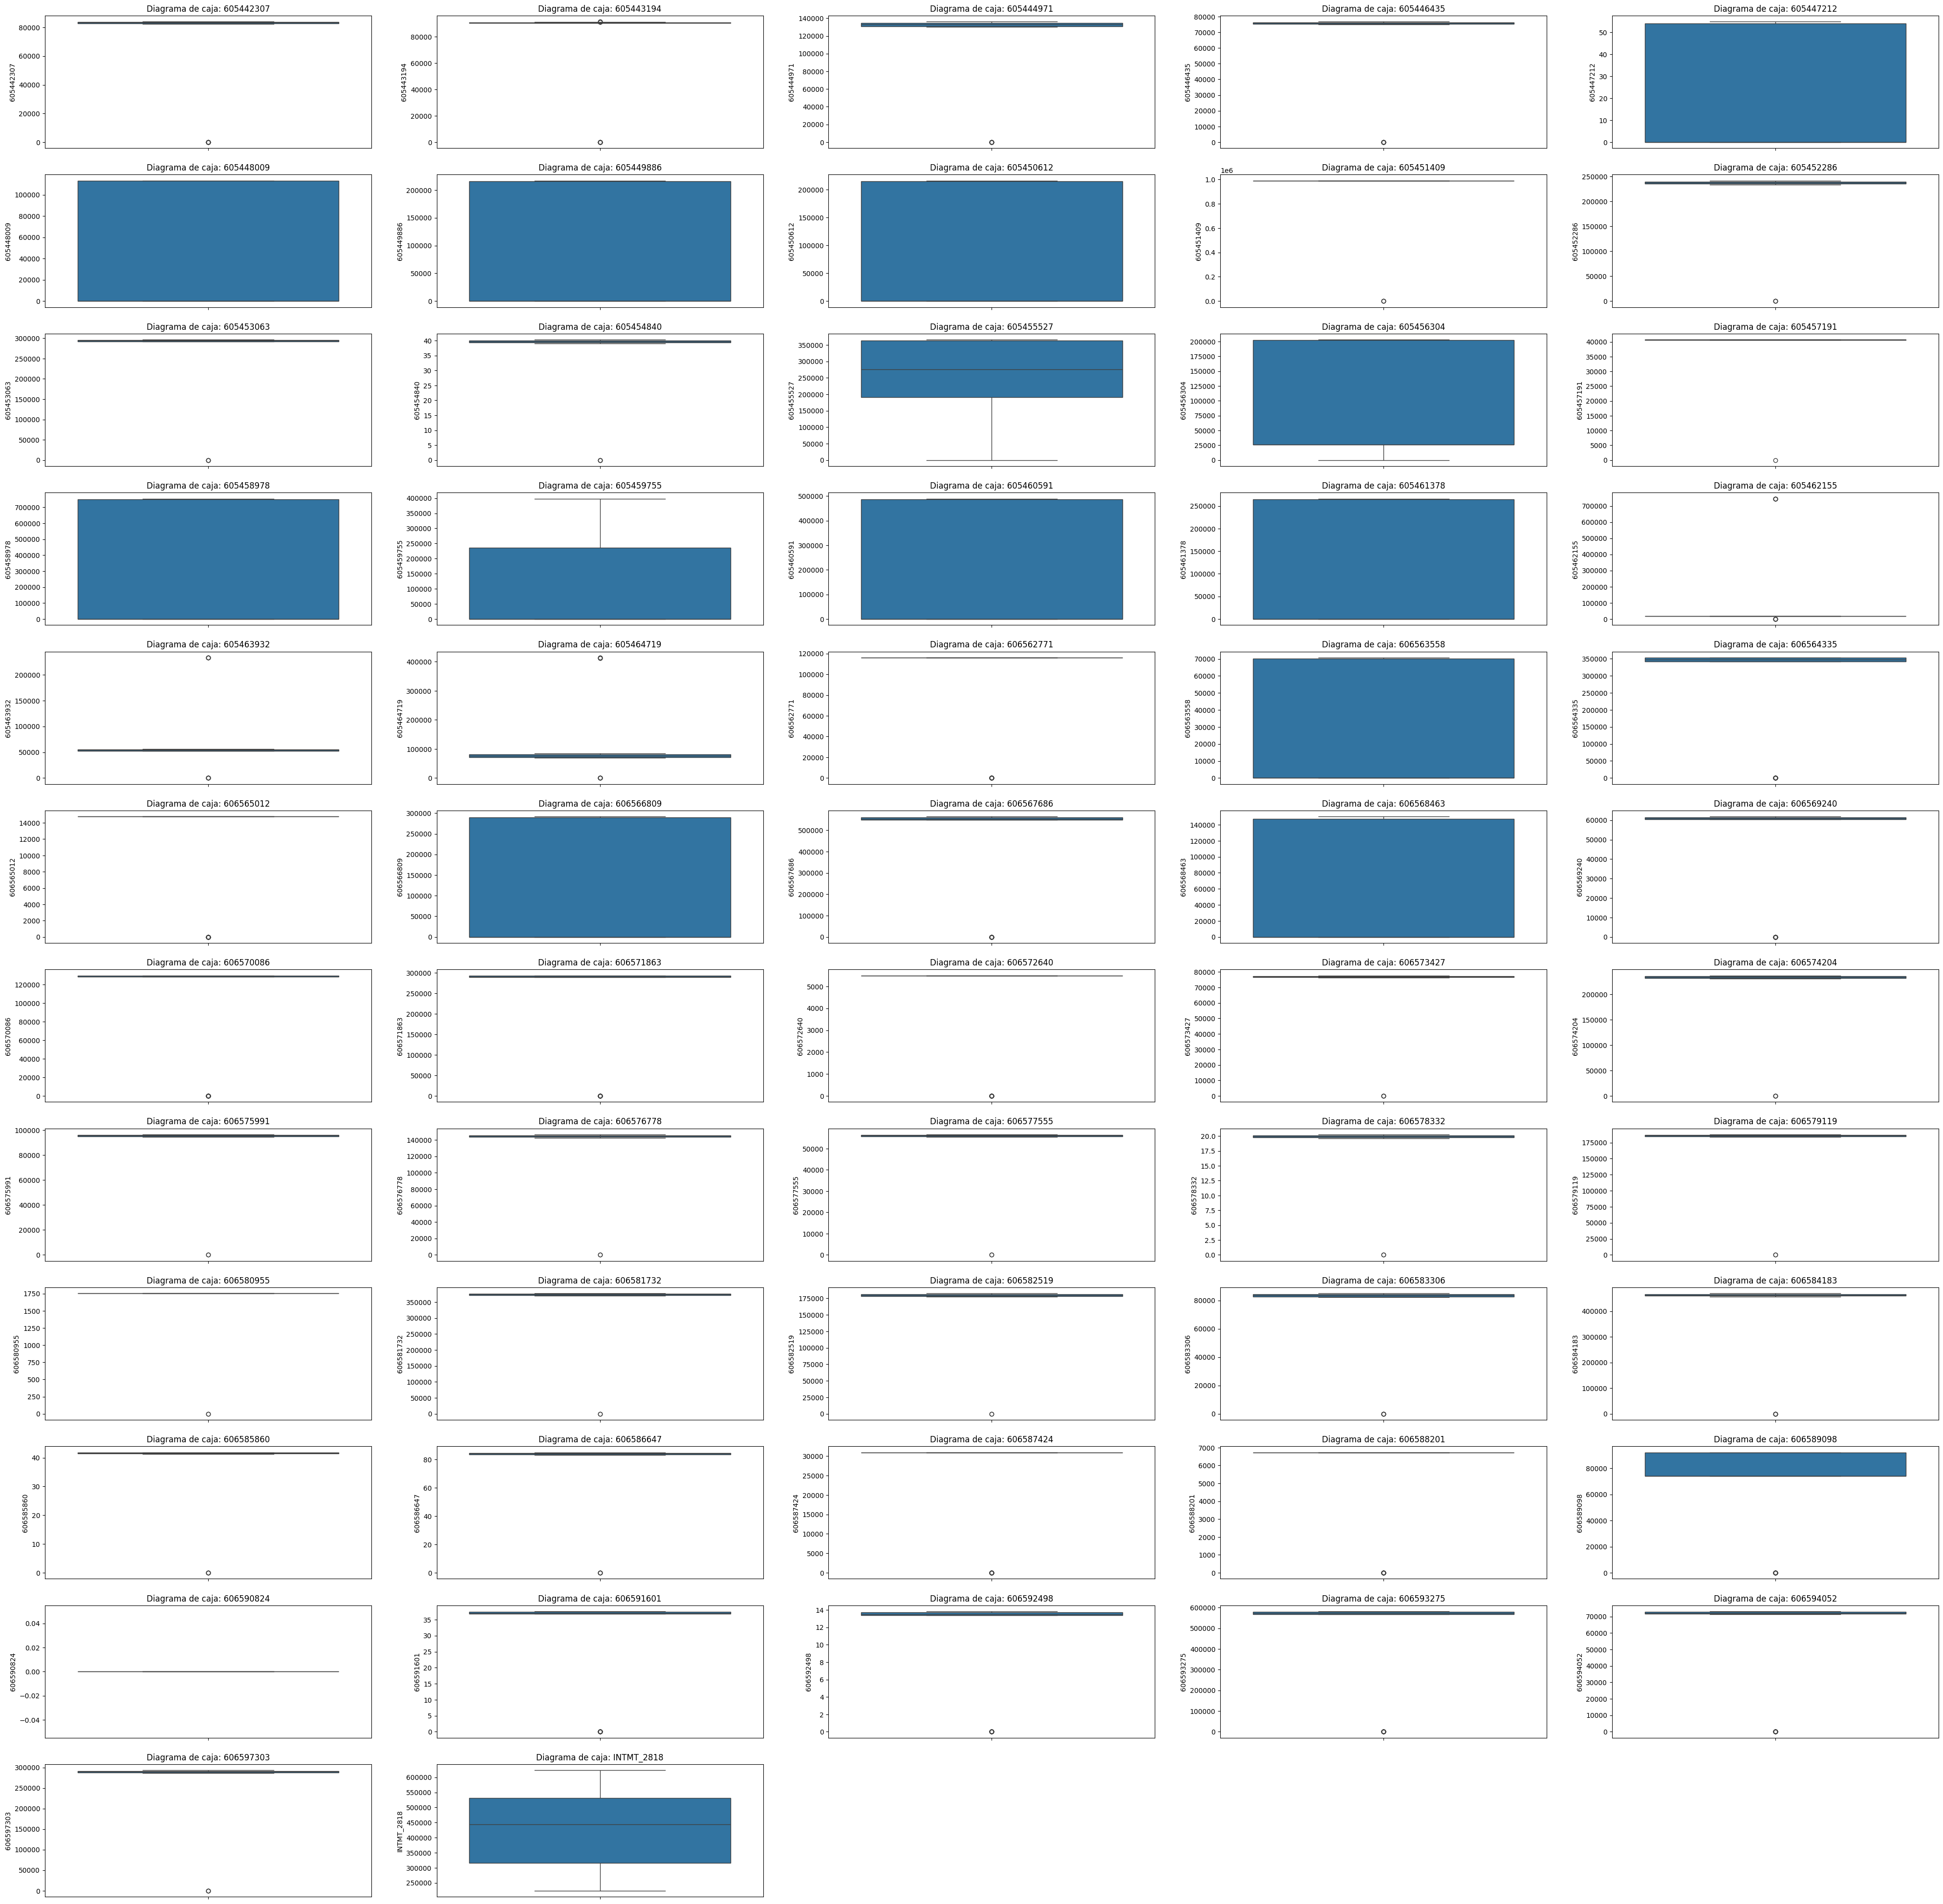

In [129]:
fig, axs = plt.subplots(12,5, figsize=(50,50))
columns=datos.columns
for i, ax in enumerate(axs.flatten()):
    if i < len(columns):
        ax.set_title("Diagrama de caja: " + f'{columns[i]}')
        sbn.boxplot(datos[columns[i]], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

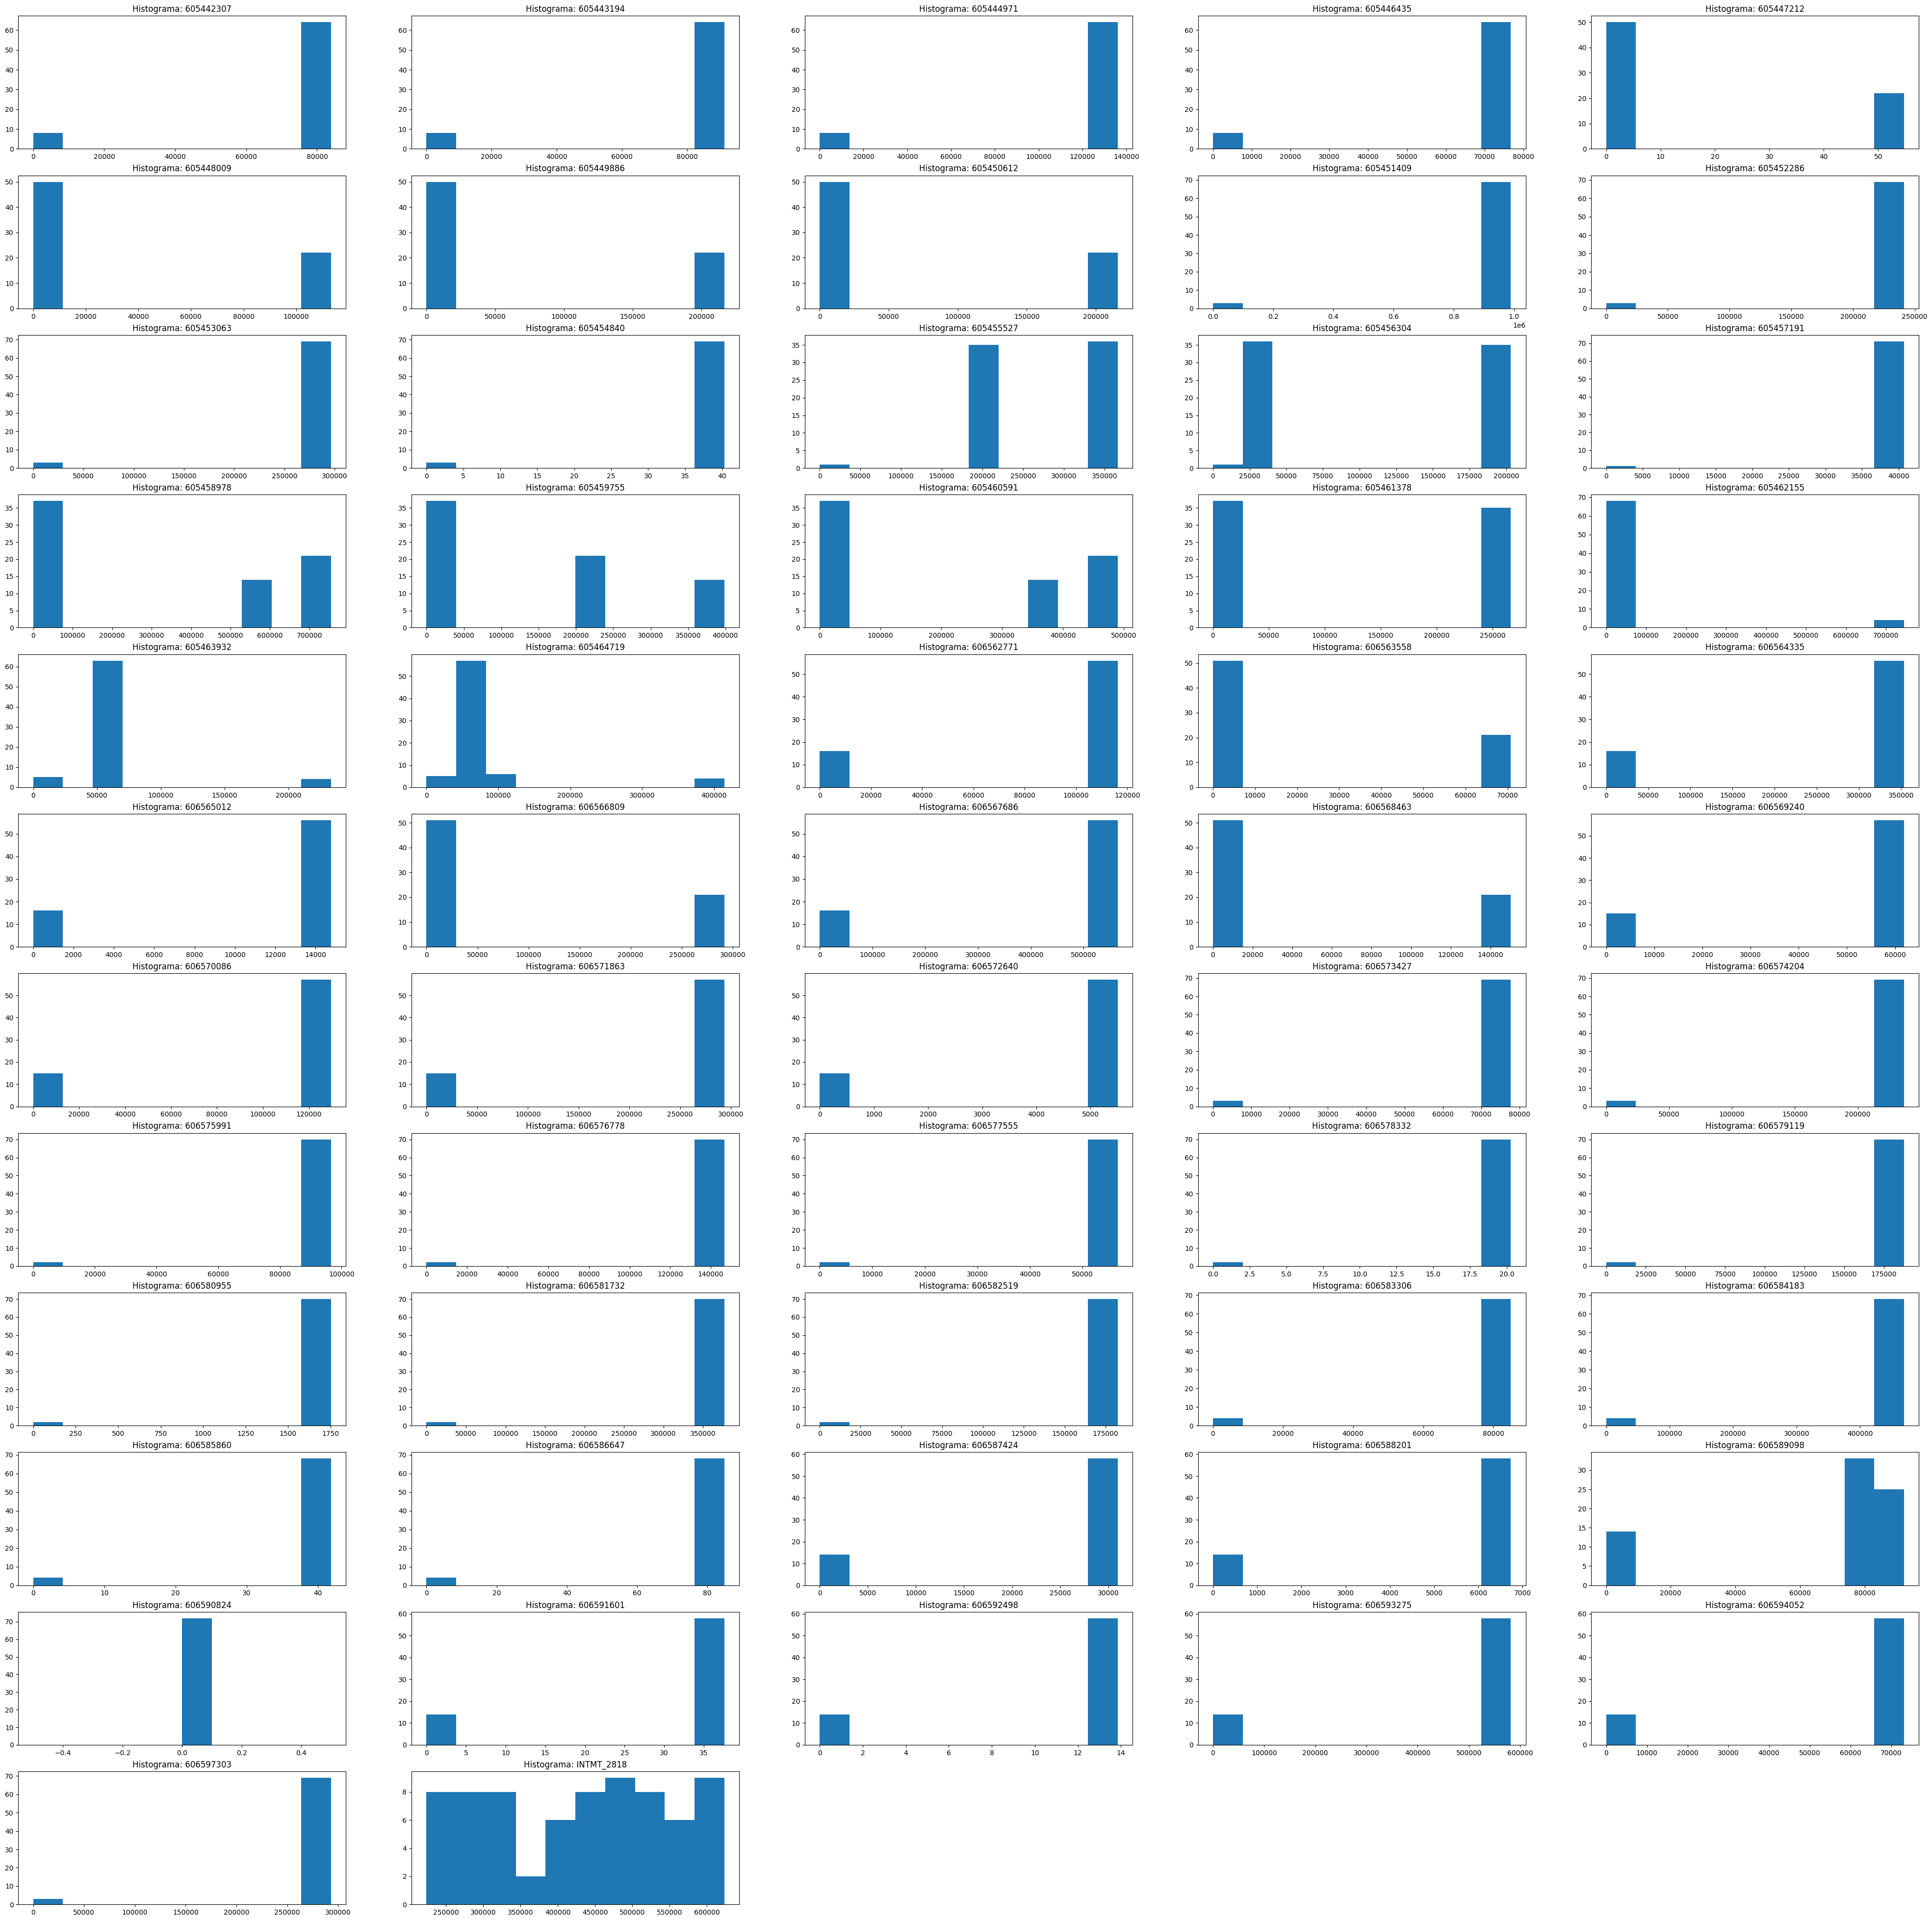

In [130]:
fig, axs = plt.subplots(12,5, figsize=(50,50))
columns=datos.columns
for i, ax in enumerate(axs.flatten()):
    if i < len(columns):
        ax.set_title("Histograma: " + f'{columns[i]}')
        ax.hist(datos[columns[i]])
    else:
        ax.set_visible(False)
plt.show()

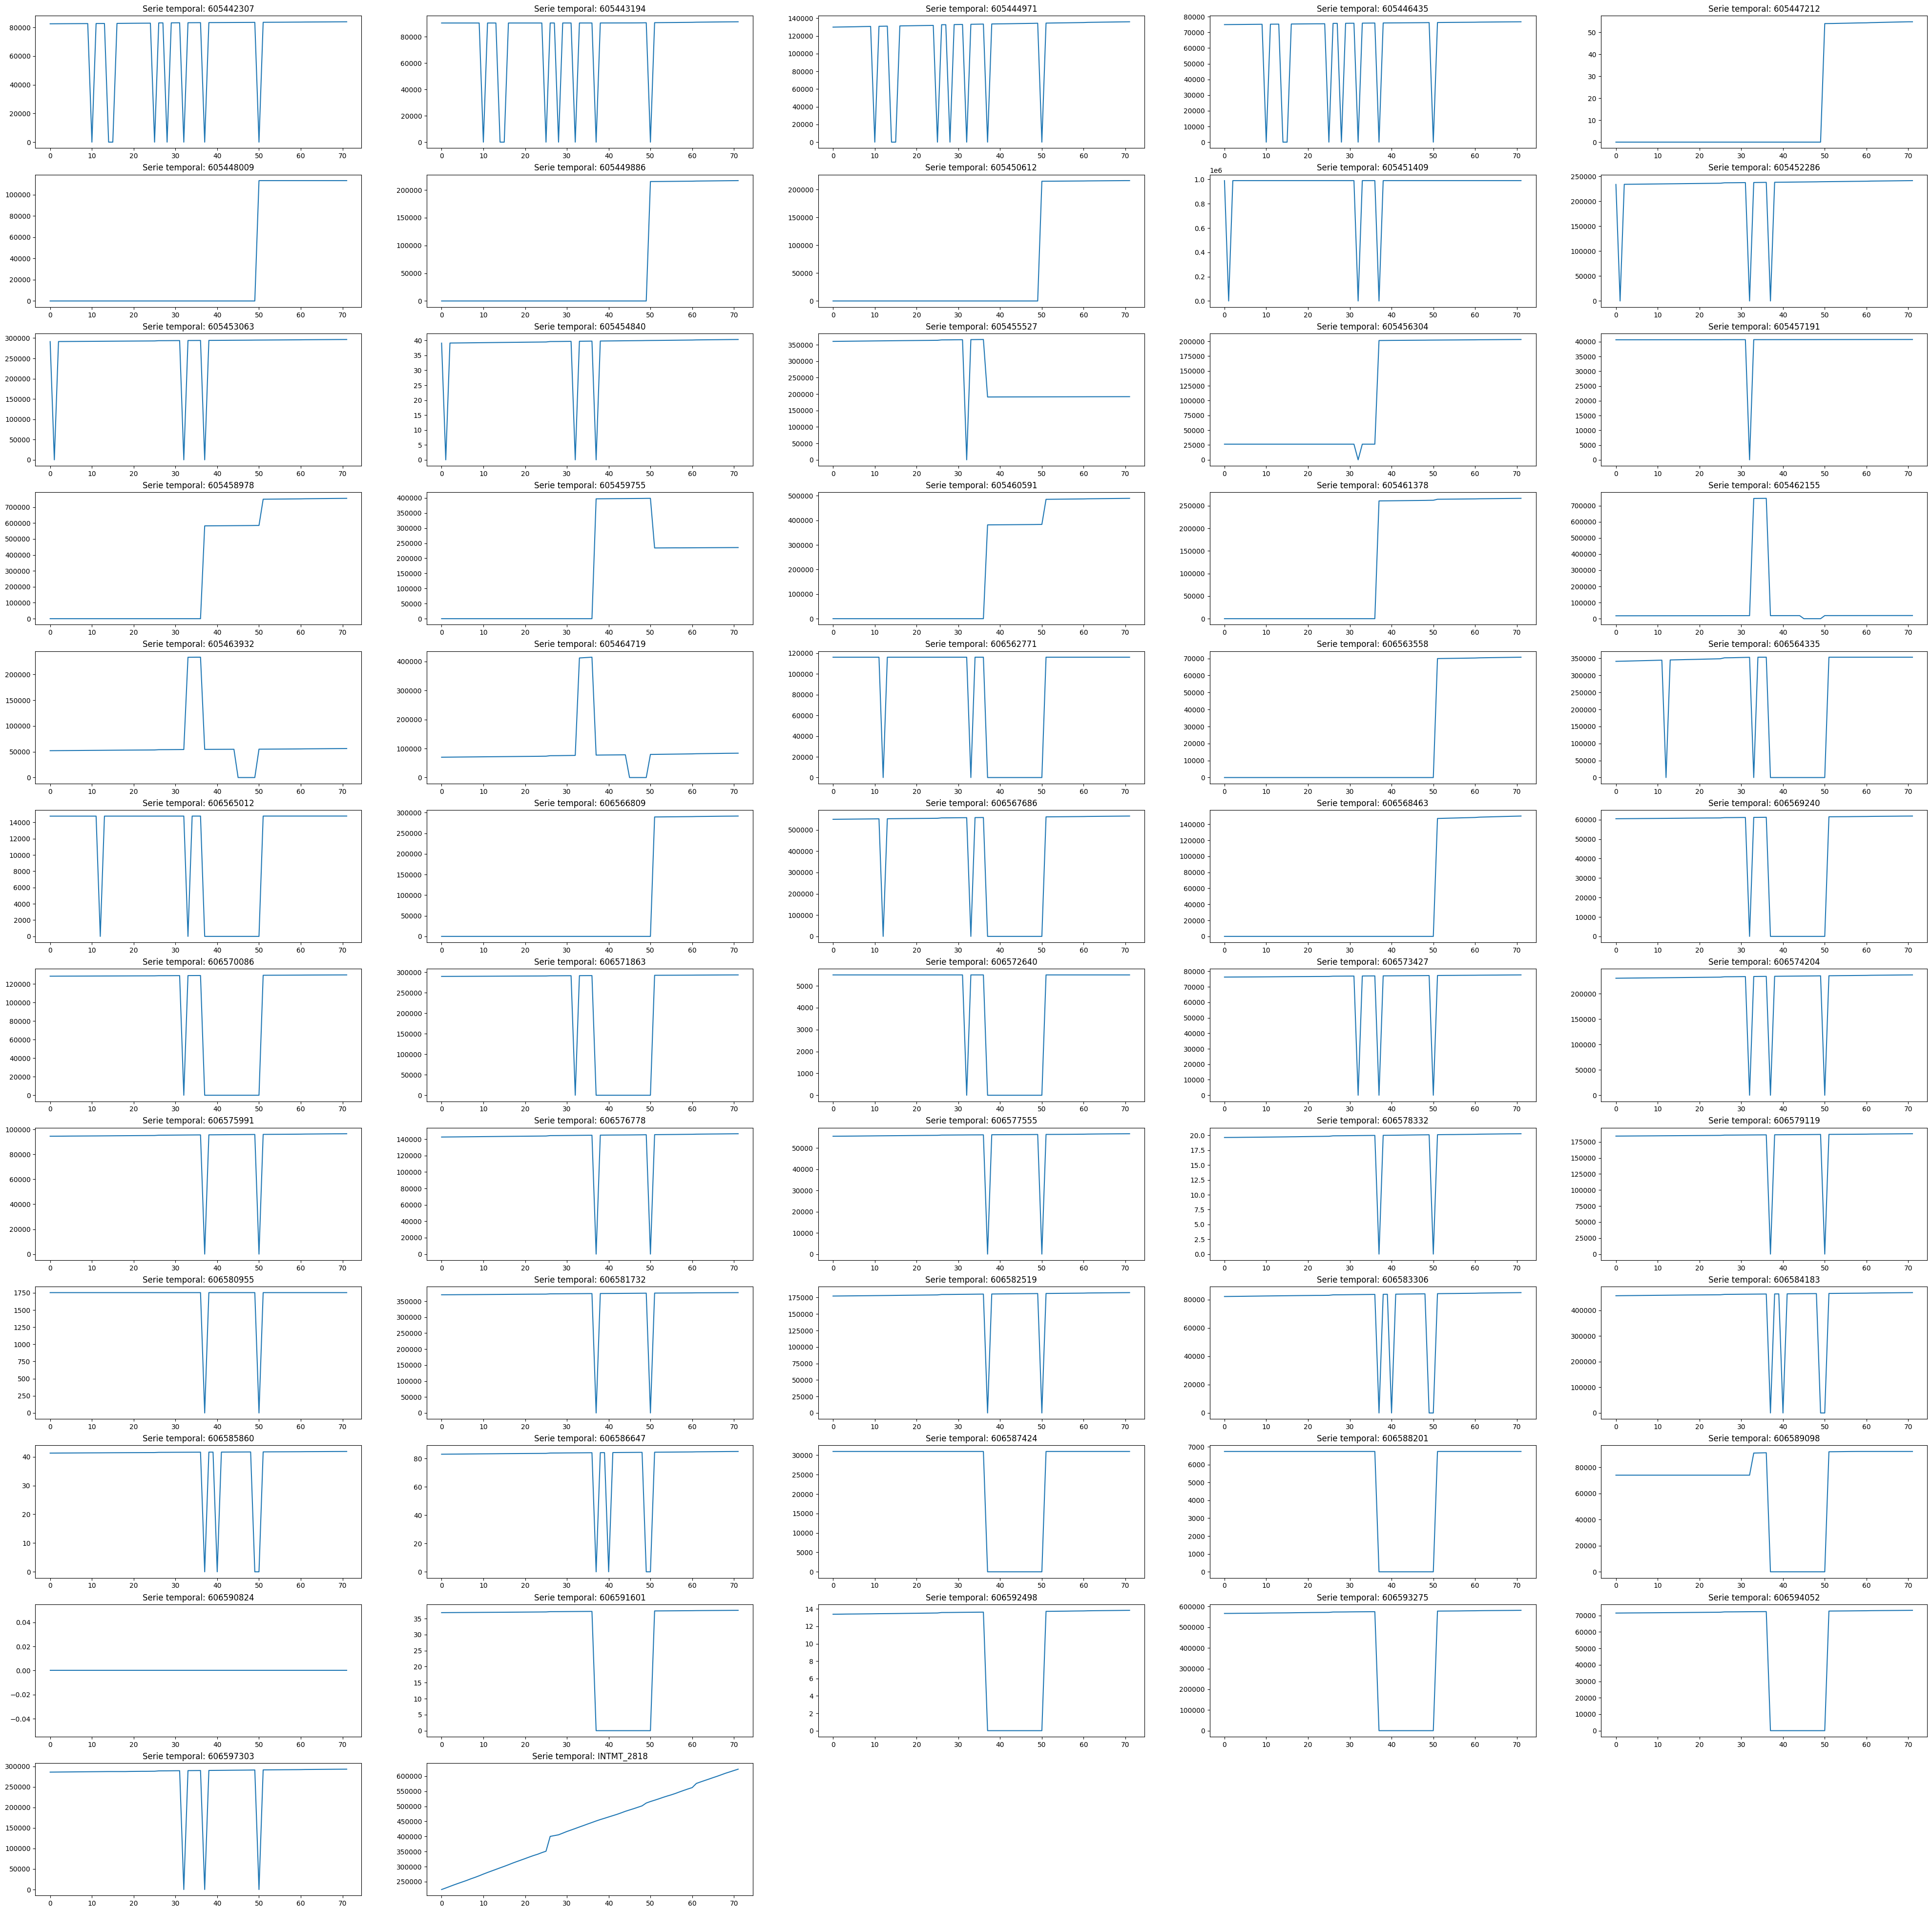

In [131]:
fig, axs = plt.subplots(12,5, figsize=(50,50))
columns=datos.columns
for i, ax in enumerate(axs.flatten()):
    if i < len(columns):
        ax.set_title("Serie temporal: " + f'{columns[i]}')
        ax.plot(datos[columns[i]])
    else:
        ax.set_visible(False)
plt.show()

<ipython-input-132-a79795466f81>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(datos[columns[i]],ax=ax)
<ipython-input-132-a79795466f81>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(datos[columns[i]],ax=ax)
<ipython-input-132-a79795466f81>:6: UserWarning: 

`distplot` is a deprecated func

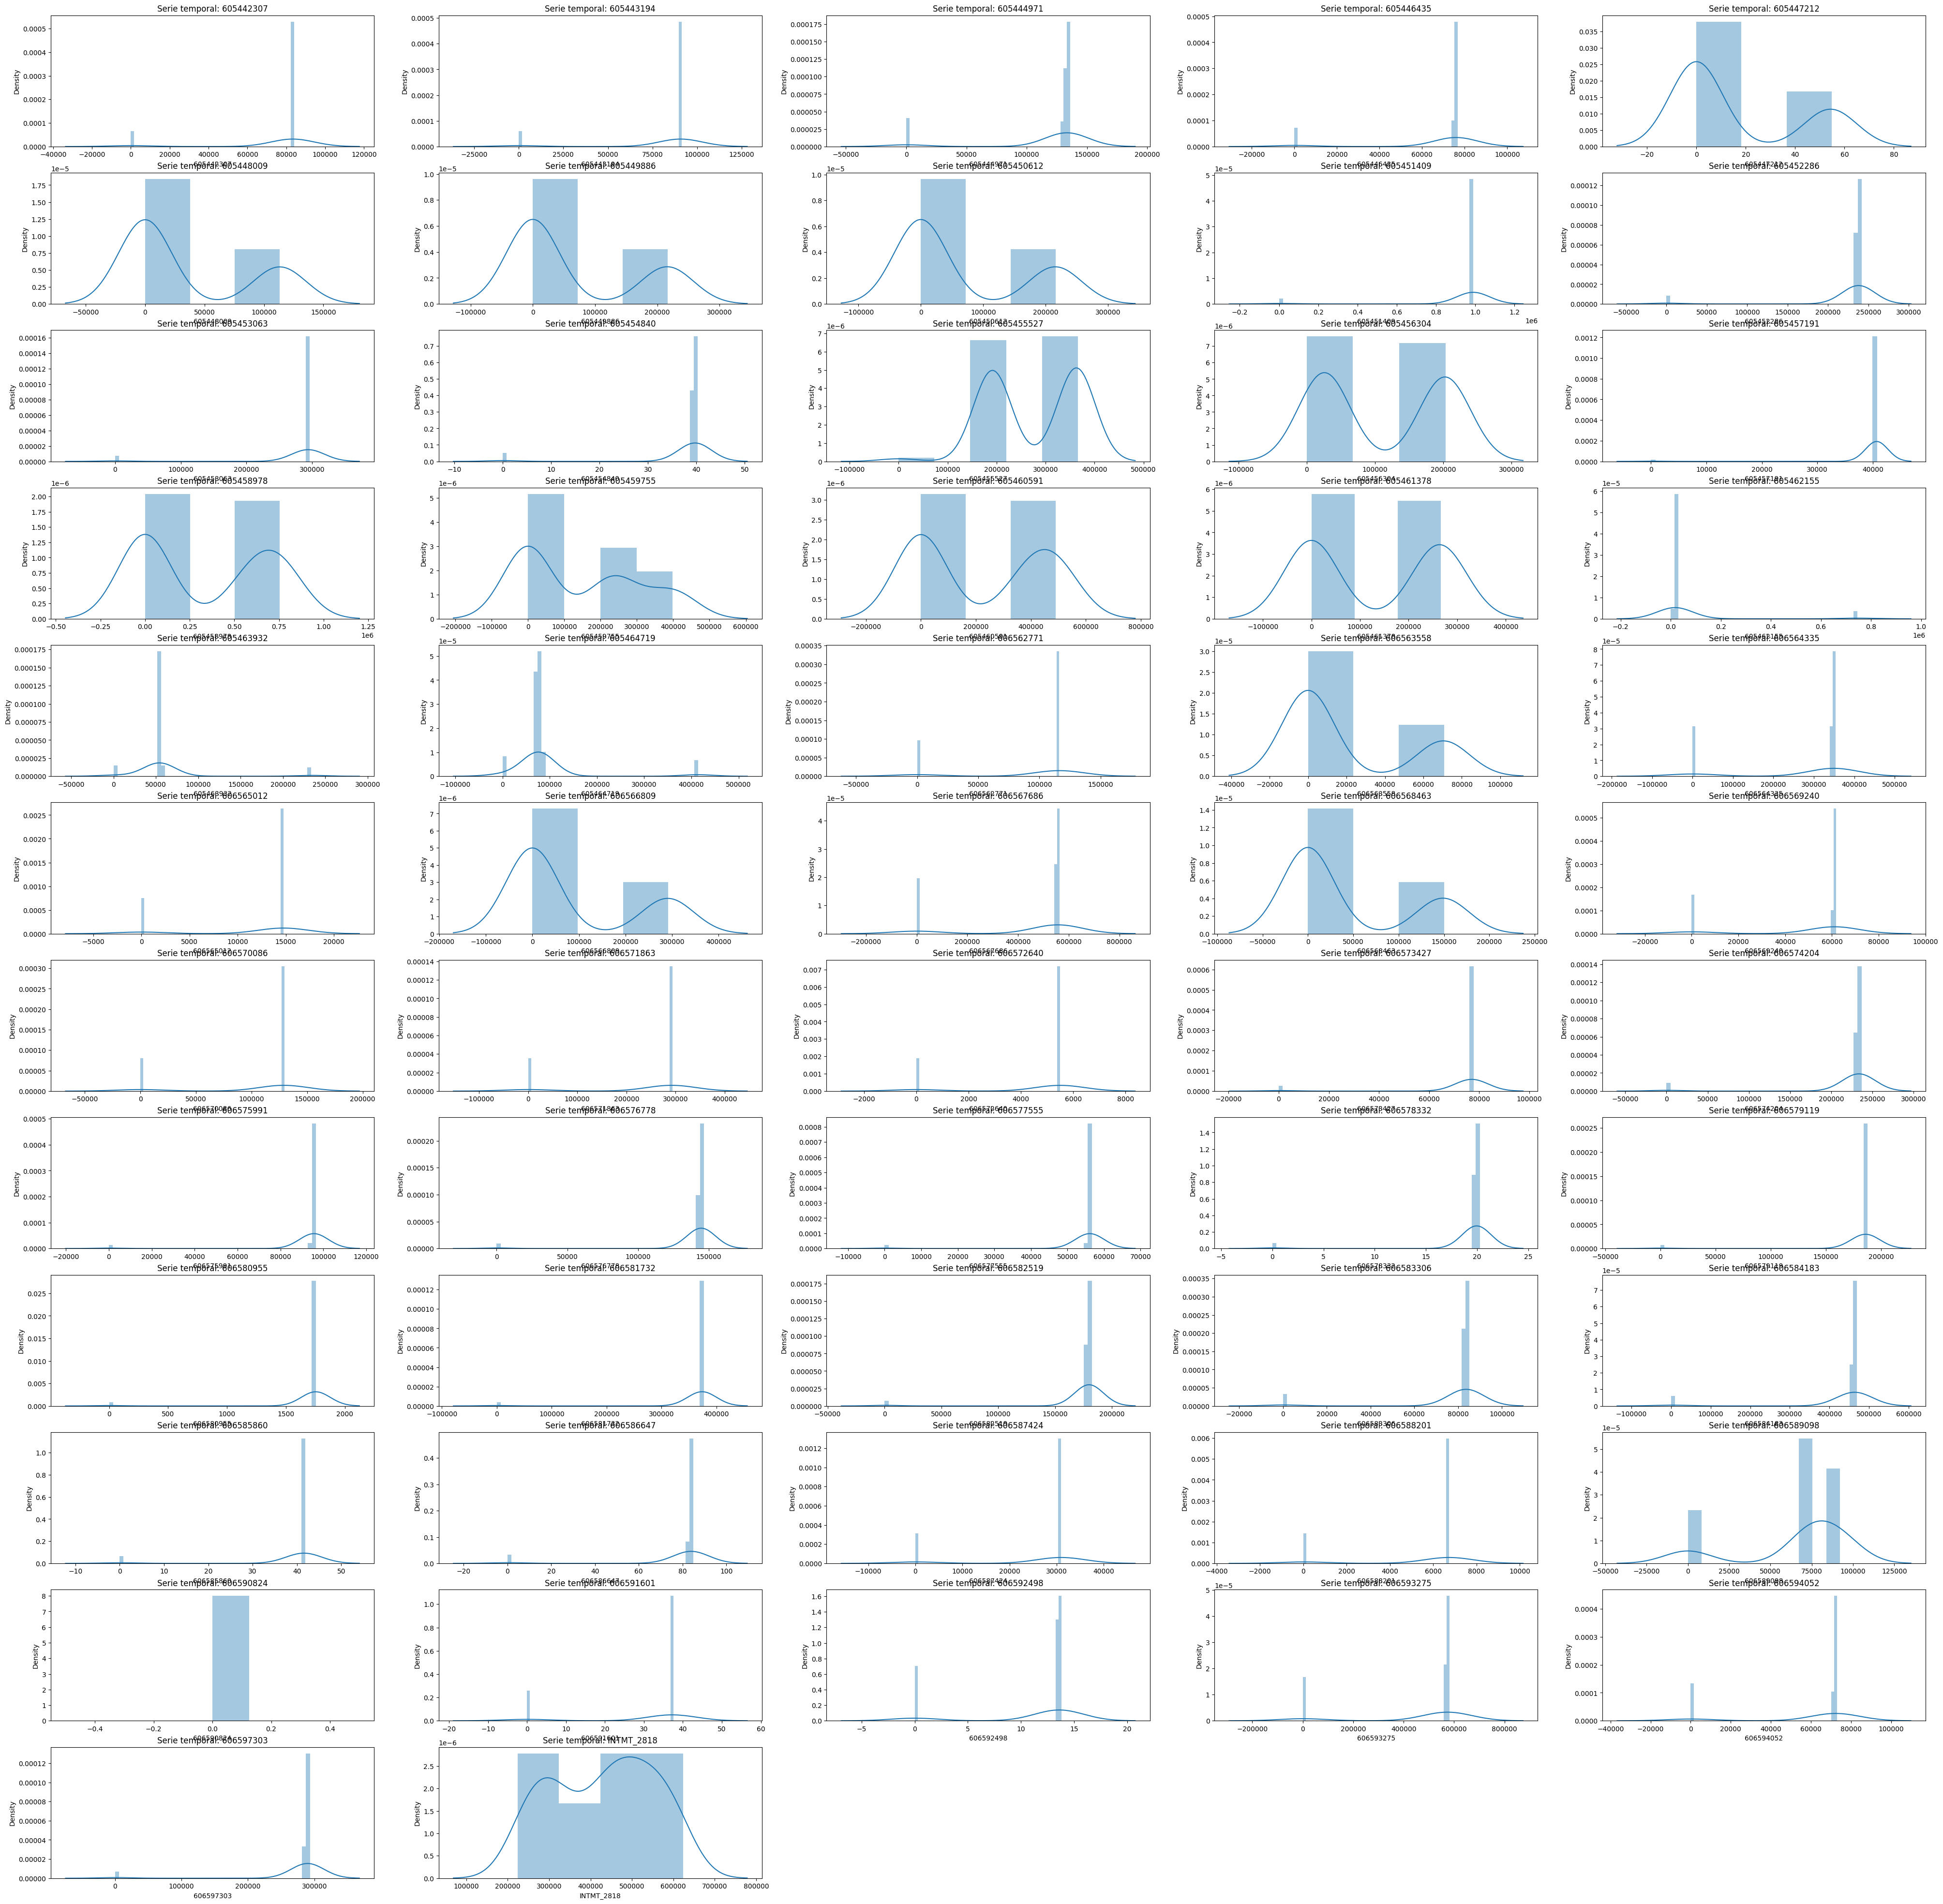

In [132]:
fig, axs = plt.subplots(12,5, figsize=(50,50))
columns=datos.columns
for i, ax in enumerate(axs.flatten()):
    if i < len(columns):
        ax.set_title("Serie temporal: " + f'{columns[i]}')
        sbn.distplot(datos[columns[i]],ax=ax)
    else:
        ax.set_visible(False)
plt.show()

# Modelo

In [ ]:
input_dim = .shape[1]
model_impute = keras.Sequential()
model_impute.add(layers.Dense(20,activation='relu', input_dim=input_dim, kernel_initializer='he_uniform'))
model_impute.add(layers.Dense(16,activation='relu', kernel_initializer='he_uniform'))
model_impute.add(layers.Dense(10,activation='relu', kernel_initializer='he_uniform', name='bottleneck'))
model_impute.add(layers.Dense(16,activation='relu', kernel_initializer='he_uniform'))
model_impute.add(layers.Dense(20,activation='relu', kernel_initializer='he_uniform'))
model_impute.add(layers.Dense(input_dim,activation='linear', kernel_initializer='he_uniform'))

optimizer = keras.optimizers.Adam(learning_rate=0.03)
model_impute.compile(optimizer = optimizer, loss = 'msle')
model_impute.summary()